In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("Sleep_health_and_lifestyle_dataset (1).csv")
data


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Data Pre Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
data['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [5]:
#Checking the missing values 
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
#3Drop column Person ID
data.drop('Person ID', axis=1, inplace=True)

In [7]:
#checking the number of Unique values
print("Unique values")
for col in data.columns:
    print( data[col].value_counts())
    print()

Unique values
Male      189
Female    185
Name: Gender, dtype: int64

43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: Age, dtype: int64

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1    15
7.3    14
8.4    14
6.3    13
8.5    13
8.0    13
6.2    12
8.2    11
7.6    10
6.4     9
7.9     7
7.4     5
6.7     5
7.5     5
6.8     5
8.3     5
5.9     4
6.9     3
5.8     2
Name: Sleep Duration, dtype

#### Spliting the blood Pressure into two columns 

In [8]:
data['systolic_bp']=data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['diastolic_bp']=data['Blood Pressure'].apply(lambda x: x.split('/')[1])

#dropping the blood pressur column
data.drop('Blood Pressure', axis=1,inplace=True)

In [9]:
#replacing normal weight with normal

data['BMI Category']=data['BMI Category'].replace('Normal weight','Weight')

In [10]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


# Explorative data Analysis

In [13]:
#It Involves two phas

#1. Understanding the data by plotting the variables

In [14]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'systolic_bp', 'diastolic_bp'],
      dtype='object')

<Axes: xlabel='Sleep Disorder', ylabel='Count'>

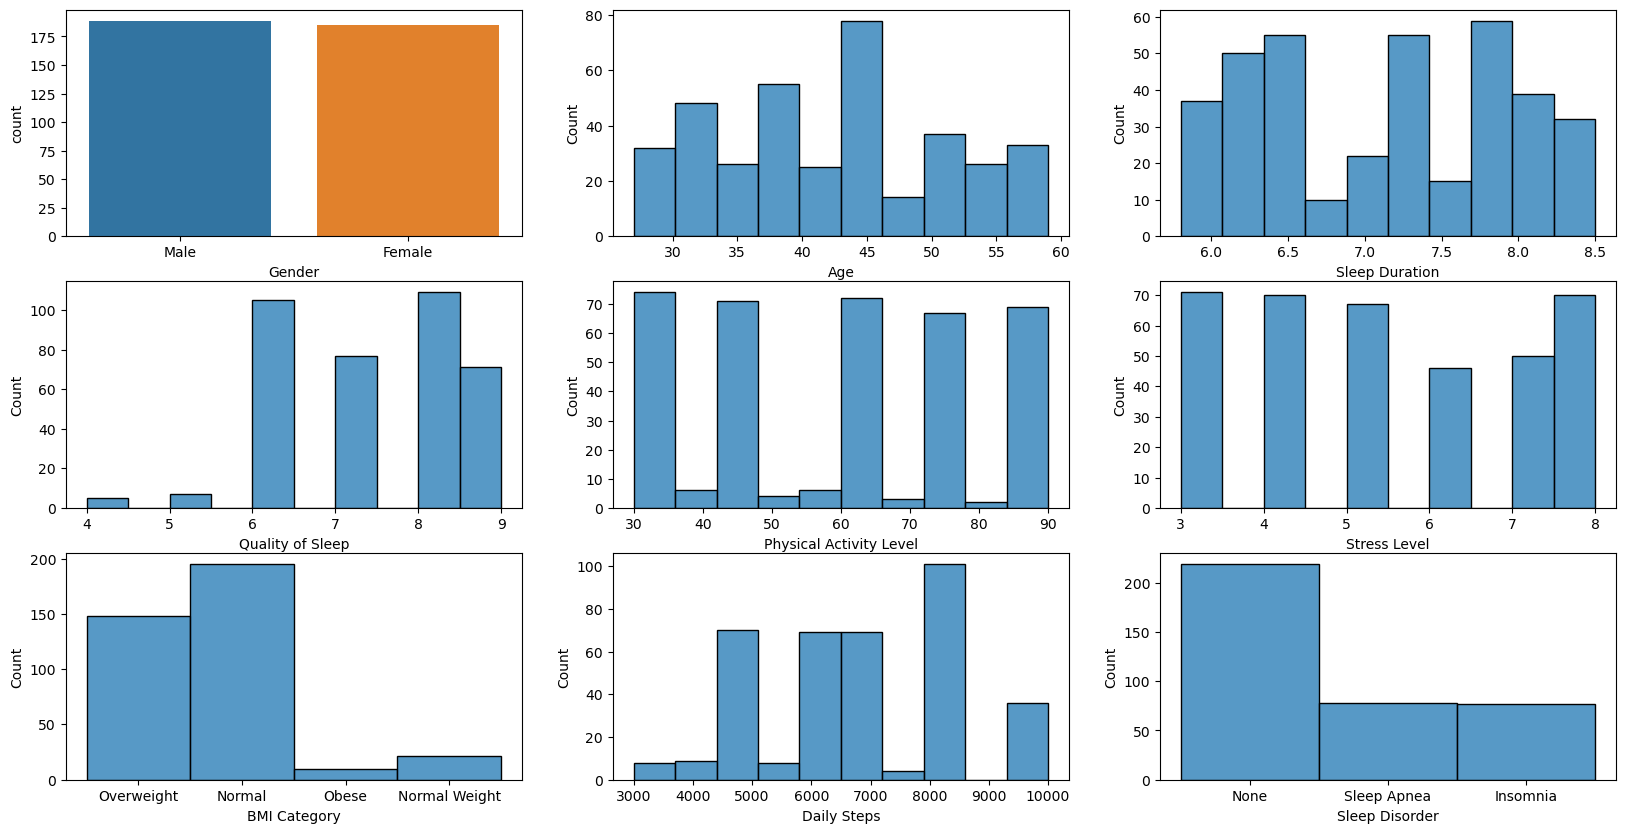

In [15]:
fig, ax= plt.subplots(3,3, figsize=(20,10))
sns.countplot(x='Gender', data=data, ax=ax[0,0])
sns.histplot(x='Age', data=data, ax=ax[0,1], bins=10)
sns.histplot(x='Sleep Duration', data=data, ax=ax[0,2], bins=10)
sns.histplot(x='Quality of Sleep', data=data, ax=ax[1,0], bins=10)
sns.histplot(x='Physical Activity Level', data=data, ax=ax[1,1], bins=10)
sns.histplot(x='Stress Level', data=data, ax=ax[1,2], bins=10)
sns.histplot(x='BMI Category', data=data, ax=ax[2,0], bins=10)
sns.histplot(x='Daily Steps', data=data, ax=ax[2,1], bins=10)
sns.histplot(x='Sleep Disorder', data=data, ax=ax[2,2], bins=10)



                      

The number of Males and Females is almost equal, out of which majority of the people have age between 30-45 years. Most of the people have sleep quality greater than 5 that means they are getting sufficient sleep. Moreover most of the people have a normal BMI which directly realtes with the distribution of sleep disorder which shows equal number of people with and without sleep disorder

### Gender and Sleep Disorder

Text(0.5, 1.0, 'Gender and Sleep Disorder')

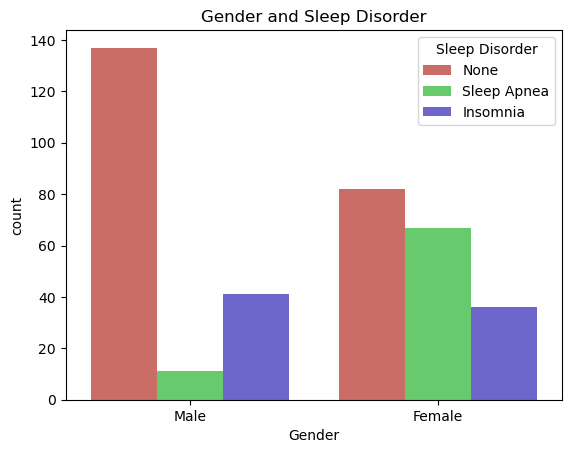

In [16]:
sns.countplot(x='Gender', data=data, palette='hls', hue='Sleep Disorder').set_title('Gender and Sleep Disorder')

Most of the males and females are not suffering from the sleep disorder, where female have more sleep oredrer as compared to the Males. The number of females suffereing from sleep apnewis quite high as compared to males But in contrast to that, greater number of males are suffereing from Isomia as comapred to females

### Effect of occupation on Sleep Disorder

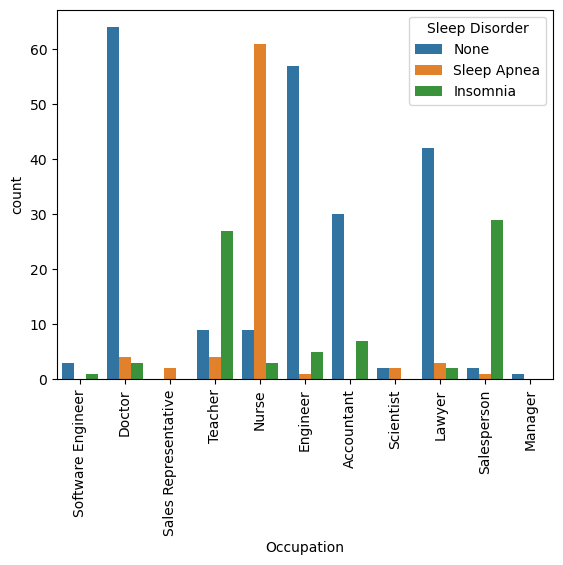

In [17]:
ax= sns.countplot(x='Occupation', data=data, hue='Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
plt.show()

From the above Graph it is clear that the occupation has a huge impact on the sleep disorder, Nurses are more subjected to have the sleep Apenea as compared to other occupations and very of them have no sleep disoredr. After nurses, the next most affected occuaption is the salespersons, whcih counts for the most suffering from Isomia followed by teachers, however there are some occupation where most of the people have very few instance of sleep apenear and Isomia such as Engineers, Doctors, accountant, Lawyer. The software engineers and managers are so less in number so I cannot say much about that, but the occupation sales Representive has slowly only Sleep apenea and no Isomia or No Sleep disorder

### BMI abd Sleep Disorder


Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

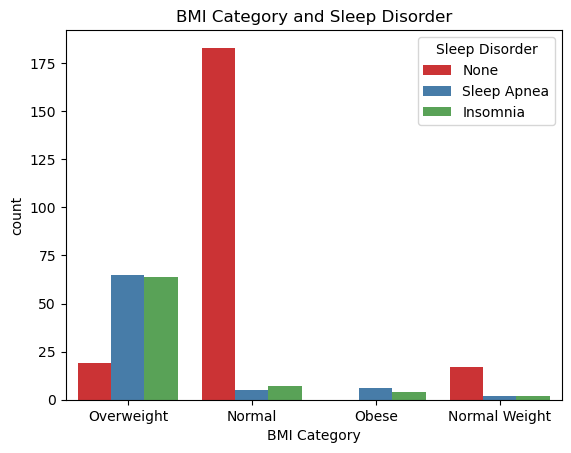

In [18]:
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=data, palette='Set1').set_title('BMI Category and Sleep Disorder')

In [19]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()

In [20]:
vars1=['Gender','Occupation','BMI Category', 'Sleep Disorder']

for i in vars1:
    label_encoder.fit(data[i].unique())
    data[i]=label_encoder.transform(data[i])
    print(i,":", data[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [3 0 2 1]
Sleep Disorder : [1 2 0]


## Correlation Matrix

<Axes: >

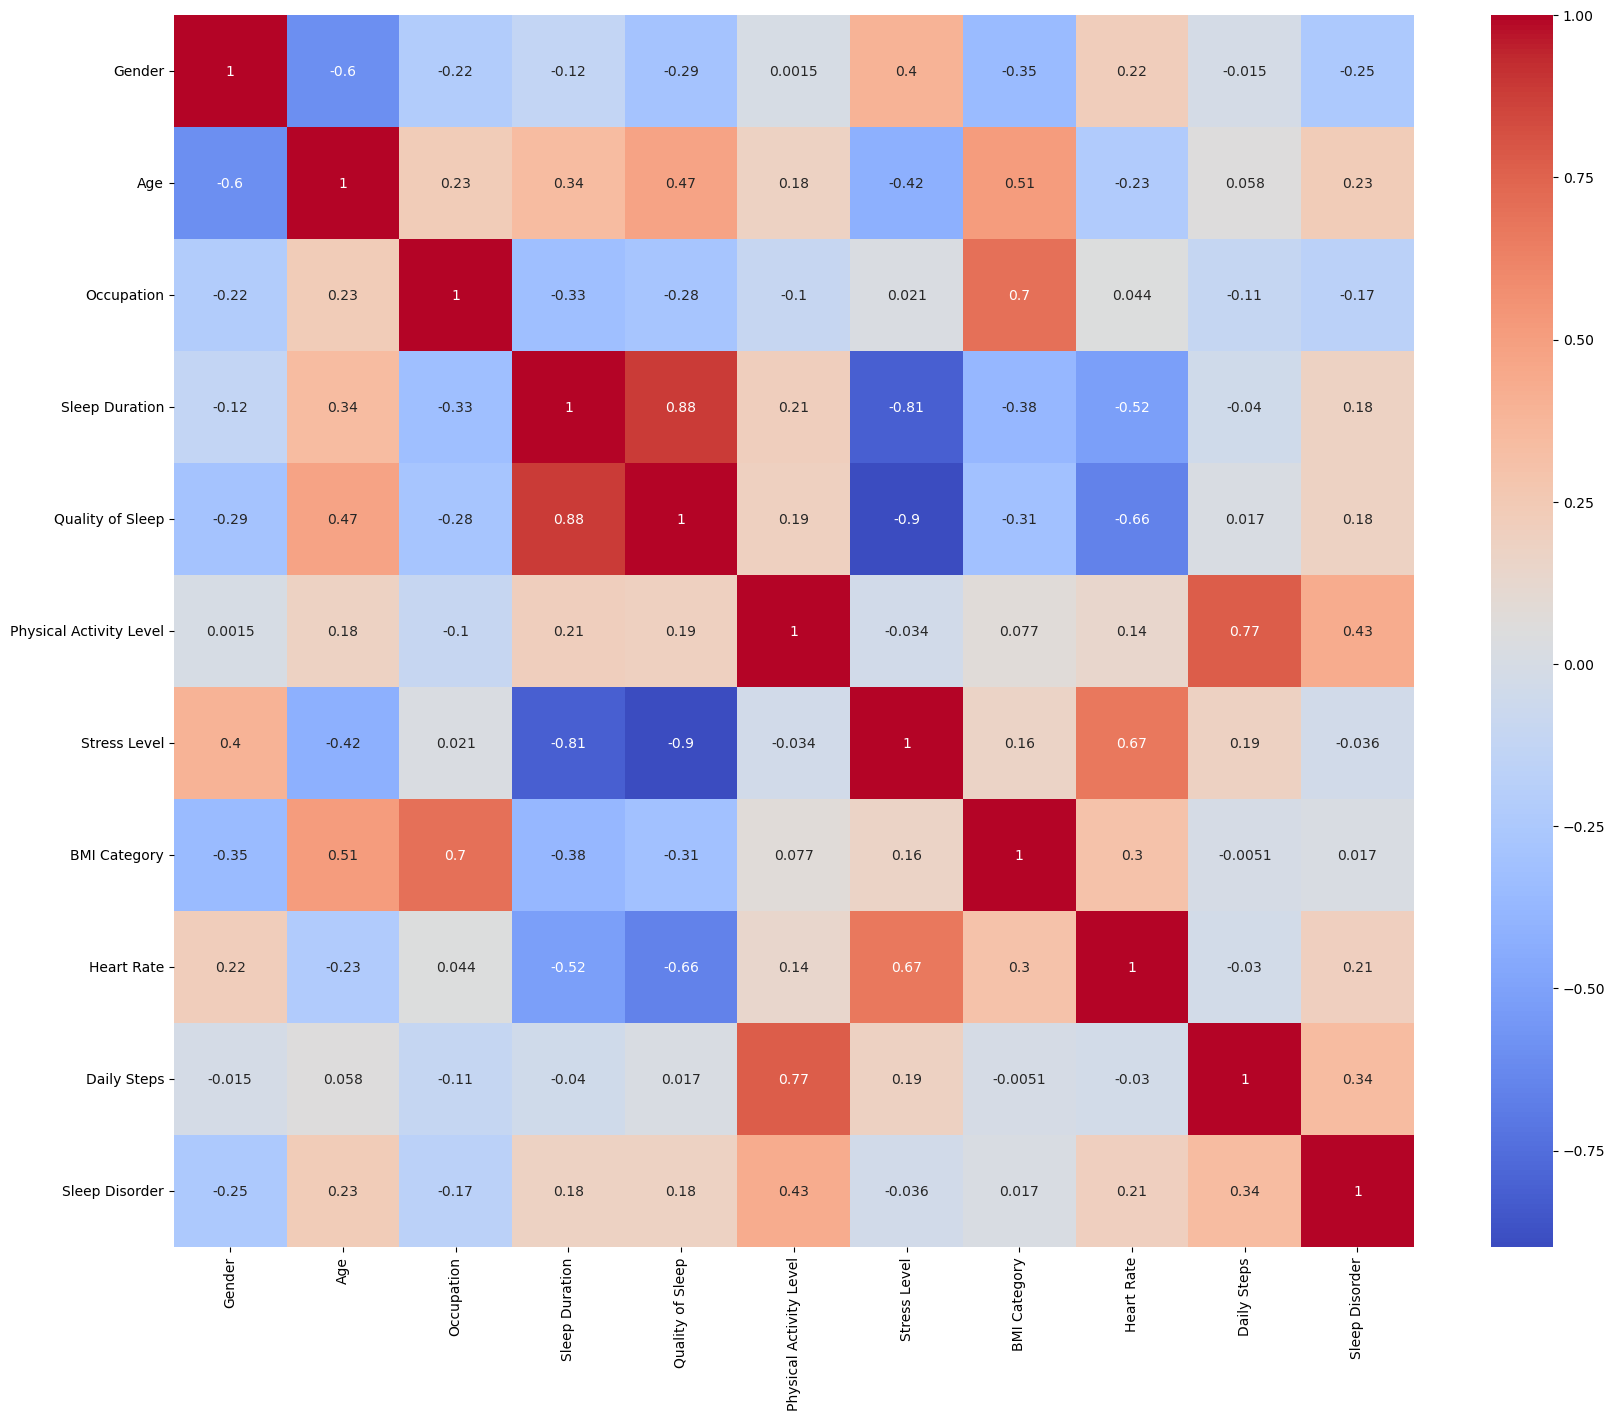

In [21]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

## Train and Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(data.drop('Sleep Disorder', axis=1), data['Sleep Disorder'], test_size=0.3, random_state=100)

In [23]:
X_train.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic_bp,diastolic_bp
173,1,41,3,7.7,8,90,5,0,70,8000,130,85
35,1,31,1,6.1,6,30,8,0,72,5000,125,80
260,0,45,10,6.6,7,45,4,3,65,6000,135,90
39,1,31,1,7.6,7,75,6,0,70,8000,120,80
288,0,50,5,6.0,6,90,8,3,75,10000,140,95


## Data Normalization

In [24]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

# Model Building

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

### 1. Decision Tree Classifer

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.98      0.95      0.97        63
           2       0.80      0.92      0.86        26

    accuracy                           0.91       113
   macro avg       0.88      0.89      0.88       113
weighted avg       0.92      0.91      0.91       113

Accuracy: 0.911504424778761


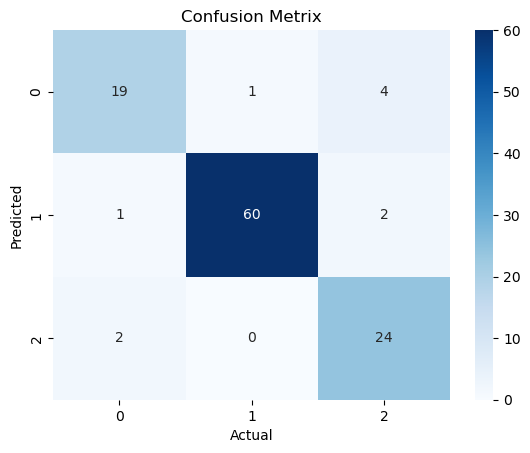

In [26]:
# Create Model Object
dtree= DecisionTreeClassifier()

# Training the model with Train dataset
dtree.fit(X_train_scale, Y_train)

#Prediction on test data
d_pred= dtree.predict(X_test_scale)

# Model Evaluation
print(classification_report(Y_test, d_pred))
print("Accuracy:", accuracy_score(Y_test,d_pred))

#Confusion Metrix
sns.heatmap(confusion_matrix(Y_test,d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Metrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Distribution Plot for predicted and actual.

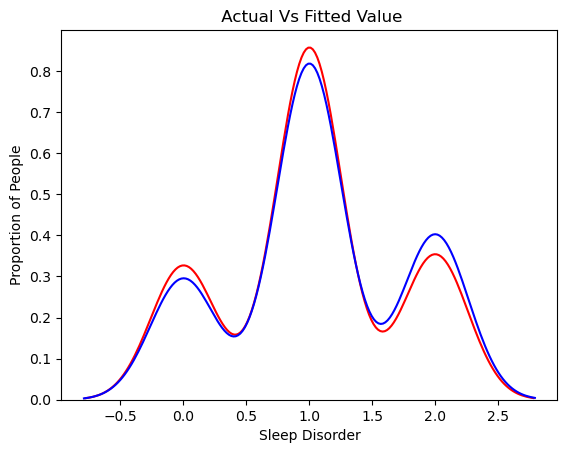

In [27]:
ax=sns.distplot(Y_test, hist=False, color='r', label='Actual Value')
sns.distplot(d_pred, hist=False, color='b', label='Predicted Value', ax=ax)
plt.title(' Actual Vs Fitted Value')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

## 2. Random Forest- Its a Bagging Model

In [28]:
from sklearn.ensemble import RandomForestClassifier


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.98      0.97      0.98        63
           2       0.83      0.92      0.87        26

    accuracy                           0.92       113
   macro avg       0.89      0.89      0.89       113
weighted avg       0.92      0.92      0.92       113

Accuracy: 0.9203539823008849


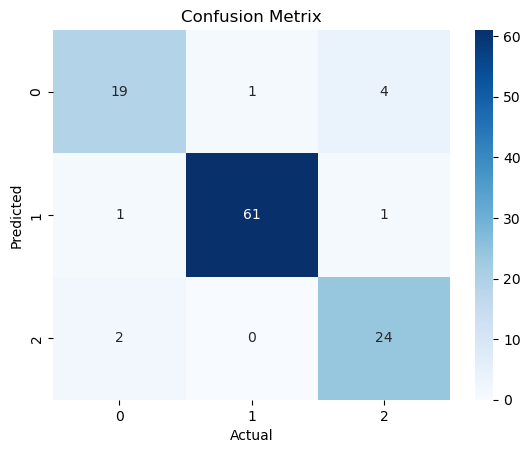

In [29]:
rfr=RandomForestClassifier(n_estimators=500,
                          random_state=10,
                          verbose=1,
                          n_jobs=-1)

# When you have lareg amount of data then use n_jobs=-1
rfr.fit(X_train_scale, Y_train)

r_pred=rfr.predict(X_test_scale)

print(classification_report(Y_test,r_pred))
print('Accuracy:', accuracy_score(Y_test,r_pred))
sns.heatmap(confusion_matrix(Y_test,r_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Metrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Distribution Plot for predicted and actual.

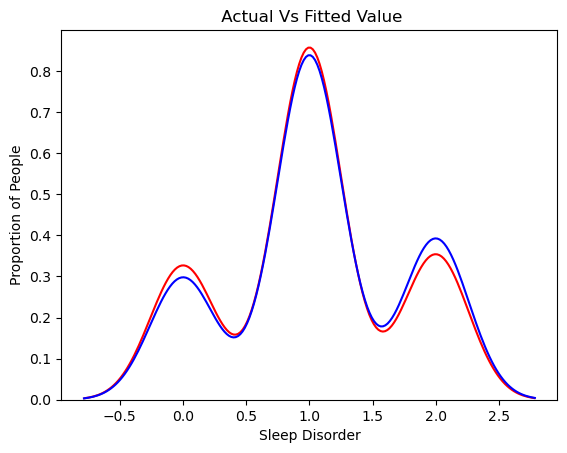

In [30]:
ax=sns.distplot(Y_test, hist=False, color='r', label='Actual Value')
sns.distplot(r_pred, hist=False, color='b', label='Predicted Value', ax=ax)
plt.title(' Actual Vs Fitted Value')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

## 3. Bagging Classifier- Bagging Approach

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    5.9s remaining:   42.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.98      0.95      0.97        63
           2       0.80      0.92      0.86        26

    accuracy                           0.91       113
   macro avg       0.88      0.89      0.88       113
weighted avg       0.92      0.91      0.91       113

Accuracy: 0.911504424778761


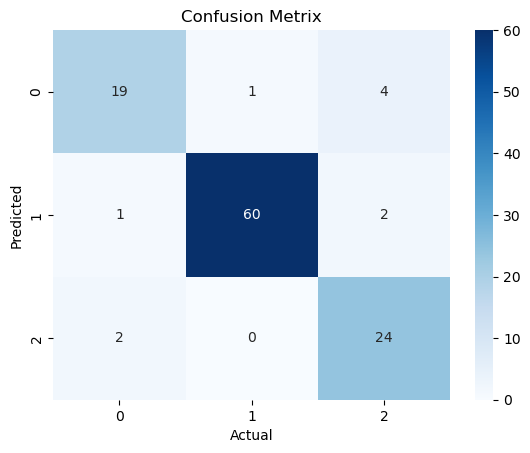

In [31]:
from sklearn.ensemble import BaggingClassifier

Bag=BaggingClassifier(n_estimators=200,
                          random_state=10,
                          verbose=1,
                          n_jobs=-1)

# When you have lareg amount of data then use n_jobs=-1
Bag.fit(X_train_scale, Y_train)

bag_pred=Bag.predict(X_test_scale)

print(classification_report(Y_test,bag_pred))
print('Accuracy:', accuracy_score(Y_test,bag_pred))
sns.heatmap(confusion_matrix(Y_test,bag_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Metrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

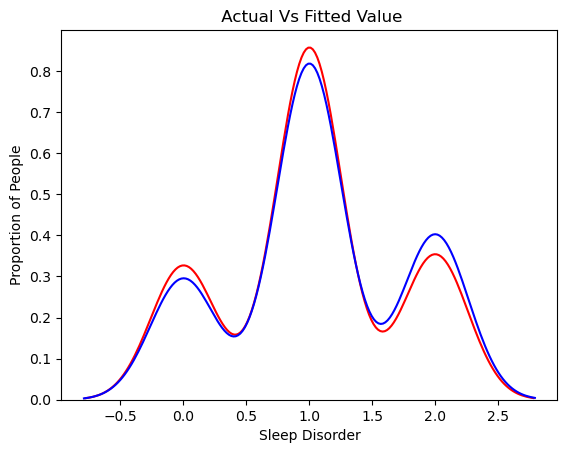

In [32]:
ax=sns.distplot(Y_test, hist=False, color='r', label='Actual Value')
sns.distplot(bag_pred, hist=False, color='b', label='Predicted Value', ax=ax)
plt.title(' Actual Vs Fitted Value')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

# Boosting Classifier

## 4. Adaboost Classifers

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.98      0.97      0.98        63
           2       0.83      0.92      0.87        26

    accuracy                           0.92       113
   macro avg       0.89      0.89      0.89       113
weighted avg       0.92      0.92      0.92       113

Accuracy: 0.9203539823008849


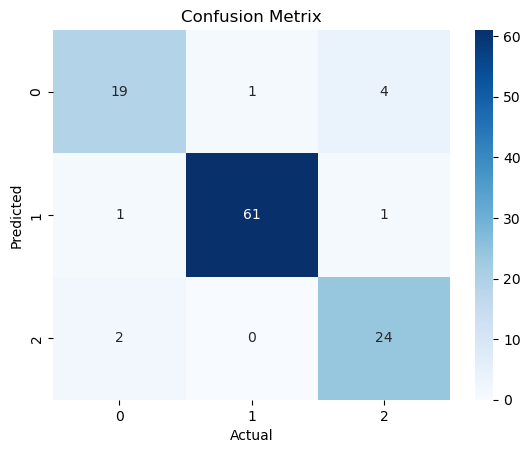

In [33]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),n_estimators=10)

# When you have lareg amount of data then use n_jobs=-1
AdaBoost.fit(X_train_scale, Y_train)

Ada_pred=AdaBoost.predict(X_test_scale)

print(classification_report(Y_test,Ada_pred))
print('Accuracy:', accuracy_score(Y_test,Ada_pred))
sns.heatmap(confusion_matrix(Y_test,Ada_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Metrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

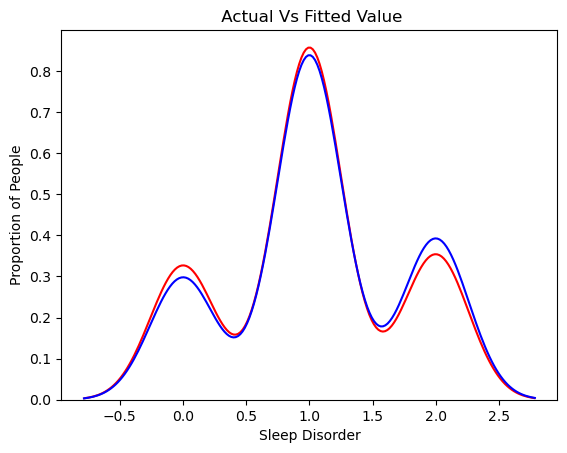

In [34]:
ax=sns.distplot(Y_test, hist=False, color='r', label='Actual Value')
sns.distplot(Ada_pred, hist=False, color='b', label='Predicted Value', ax=ax)
plt.title(' Actual Vs Fitted Value')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

# 5. Gradient Boost Classifers

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.97      0.98      0.98        63
           2       0.83      0.92      0.87        26

    accuracy                           0.92       113
   macro avg       0.90      0.89      0.89       113
weighted avg       0.92      0.92      0.92       113

Accuracy: 0.9203539823008849


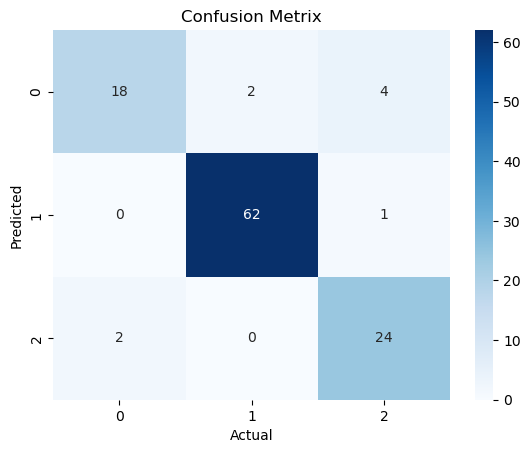

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gred=GradientBoostingClassifier(n_estimators=10,random_state=10 )

# When you have lareg amount of data then use n_jobs=-1
gred.fit(X_train_scale, Y_train)

gred_pred=gred.predict(X_test_scale)

print(classification_report(Y_test,gred_pred))
print('Accuracy:', accuracy_score(Y_test,gred_pred))
sns.heatmap(confusion_matrix(Y_test,gred_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Metrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

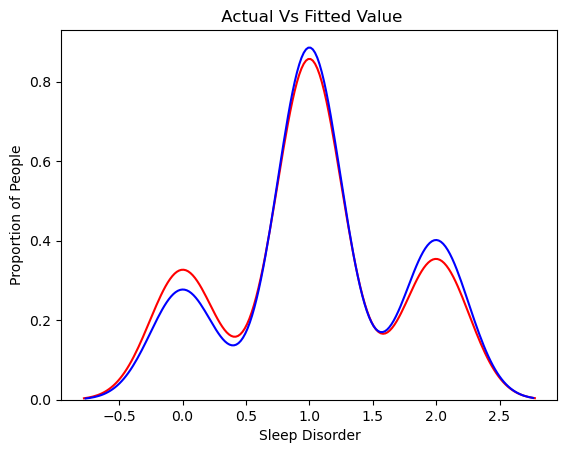

In [36]:
ax=sns.distplot(Y_test, hist=False, color='r', label='Actual Value')
sns.distplot(gred_pred, hist=False, color='b', label='Predicted Value', ax=ax)
plt.title(' Actual Vs Fitted Value')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

## Select the best  model and get the best parameter using Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'base_estimator':[None],
    'n_estimators':[10,50,100,200,300,400],
    'max_samples':[0.5,1.0],
    'max_features':[0.5,1.0],
    'bootstrap':[True, False],
    'bootstrap_features':[True,False],
    'random_state':[42]
}


best_bag=BaggingClassifier()

#Grid search Cross Validation
grid_search=GridSearchCV(estimator=best_bag, param_grid=param_grid, cv=8,n_jobs=-1,verbose=2, scoring='accuracy')

#Fit the grid serach to the data
grid_search.fit(X_train_scale, Y_train)

#Get the best parameters and best score
best_params=grid_search.best_params_
best_score=grid_search.best_score_

print('Best Parameters:', best_params)
print('Best Accuracy Score:', best_score)

#Evalute the model on the test set using best parameters 
best_model=grid_search.best_estimator_
best_y_pred=best_model.predict(X_test_scale)


Fitting 8 folds for each of 96 candidates, totalling 768 fits
Best Parameters: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100, 'random_state': 42}
Best Accuracy Score: 0.9077888257575758


              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.98      0.98      0.98        63
           2       0.83      0.92      0.87        26

    accuracy                           0.93       113
   macro avg       0.91      0.90      0.90       113
weighted avg       0.93      0.93      0.93       113

Accuracy: 0.9292035398230089


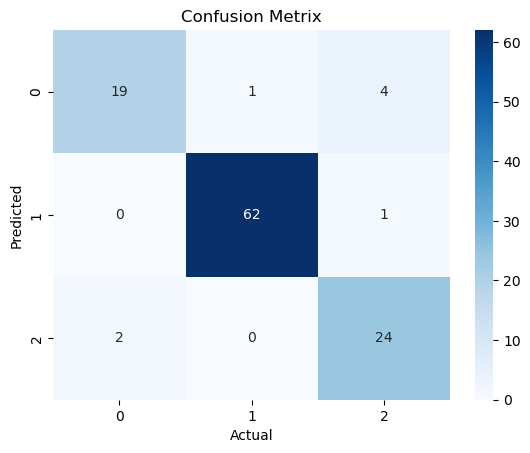

In [40]:
print(classification_report(Y_test,best_y_pred))
print('Accuracy:', accuracy_score(Y_test,best_y_pred))
sns.heatmap(confusion_matrix(Y_test,best_y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Metrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

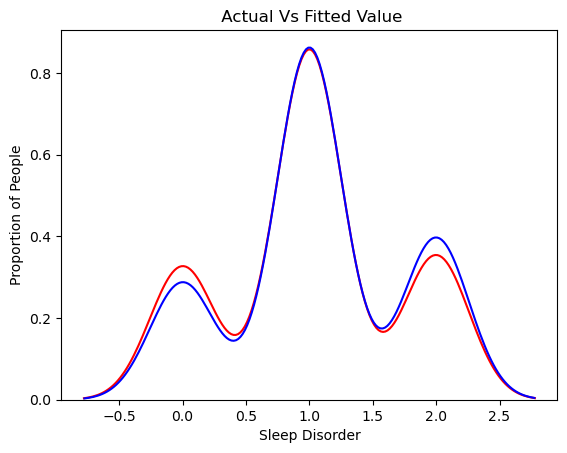

In [41]:
ax=sns.distplot(Y_test, hist=False, color='r', label='Actual Value')
sns.distplot(best_y_pred, hist=False, color='b', label='Predicted Value', ax=ax)
plt.title(' Actual Vs Fitted Value')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

# Ensemble Voting Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
estimator=[]
model1=DecisionTreeClassifier(criterion='gini', random_state=10)
estimator.append(('cart',model1))
model2=SVC(kernel='rbf',C=50, gamma=0.1)
estimator.append(('svm', model2))
model3=KNeighborsClassifier(n_neighbors=8)
estimator.append(('Knn', model3))

In [45]:
estimator

[('cart', DecisionTreeClassifier(random_state=10)),
 ('svm', SVC(C=50, gamma=0.1)),
 ('Knn', KNeighborsClassifier(n_neighbors=8))]

In [48]:
#Create the ensemble model
ensemble=VotingClassifier(estimator)
ensemble.fit(X_train_scale,Y_train)
y_pred=ensemble.predict(X_test_scale)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.98      0.98      0.98        63
           2       0.83      0.92      0.87        26

    accuracy                           0.93       113
   macro avg       0.91      0.90      0.90       113
weighted avg       0.93      0.93      0.93       113

Accuracy: 0.9292035398230089


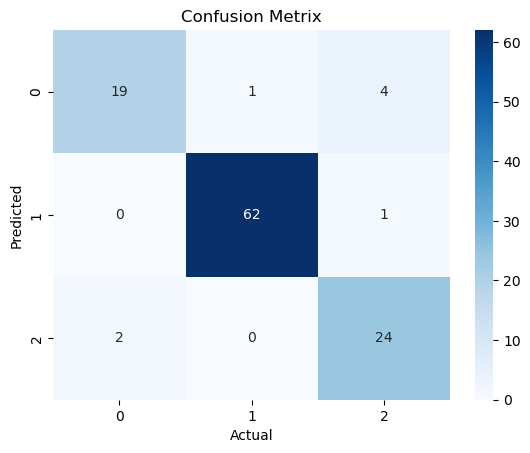

In [49]:
print(classification_report(Y_test,y_pred))
print('Accuracy:', accuracy_score(Y_test,y_pred))
sns.heatmap(confusion_matrix(Y_test,y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Metrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()